In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [257]:
monopoly_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Monopoly - All.dta")
split1_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 1 2 - All.dta")
# split3_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 3 4 - All.dta")
split5_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 5 6 - All.dta")
split7_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 7 8 - All.dta")

In [267]:
split1_root_n_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 1 2 - Root N - All.dta")
split5_root_n_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 5 6 - Root N - All.dta")

In [233]:
monopoly_rev_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Monopoly Revenue Max - All.dta")
split1_rev_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 1 2 Revenue Max - All.dta")
# split3_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 3 4 - All.dta")
split5_rev_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 5 6 Revenue Max - All.dta")
# split7_rev_results = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Split 7 8 - All.dta")

In [236]:
datasets = [monopoly_rev_results, split1_rev_results,  split5_rev_results]


for data in datasets:
    # data.ctr = np.maximum(data.ctr, 1e-3)
    # data = data.loc[0:5e6, :]
    data = data.sort_values('ctr')
    data = data.reset_index(drop=True)  
    data['pct'] = data.index / len(data) * 100
    print(data[(data['ctr'] < 0.3)].ctr.mean() * 100) 

0.3540687355892479
0.28245412891784333
0.2945110109375849


In [274]:
datasets = [monopoly_results, split1_root_n_results,  split5_root_n_results]


for data in datasets:
    # data = data.sort_values('ctr')
    # data = data.reset_index(drop=True)  
    # data['pct'] = data.index / len(data) * 100
    print(data[(data['ctr'] < 0.9)].ctr.mean() * 100)

0.3904490143979167
0.31278079797746633
0.34207836378757456


In [263]:
split1_root_n_results[split1_results.ctr == 0].shape[0]

C:\Users\ma59396\AppData\Local\Temp\5\ipykernel_36672\1631601141.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  split1_root_n_results[split1_results.ctr == 0].shape[0]


203733

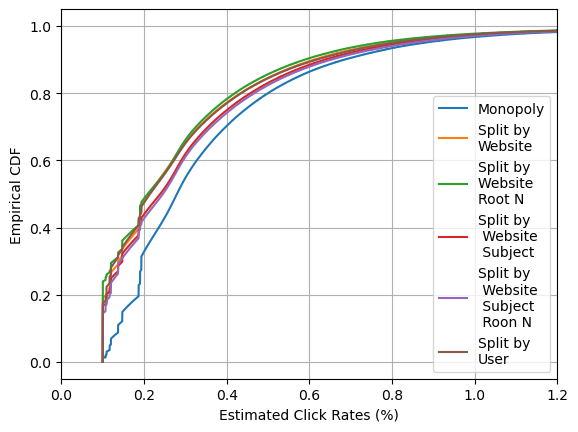

In [221]:
from statsmodels.distributions.empirical_distribution import ECDF
datasets = [monopoly_results, split1_results, split1_root_n_results, split5_results, split5_root_n_results, split7_results]
for dataset in datasets:
    ecdf = ECDF((dataset[dataset['ctr'] > 0].loc[0:, 'ctr']) * 100)
    plt.step(ecdf.x, ecdf.y, where="post")
plt.xlabel('Estimated Click Rates (%)')
plt.ylabel('Empirical CDF')
labels = ['Monopoly', 'Split by \nWebsite', 'Split by \nWebsite \nRoot N', 'Split by\n Website\n Subject', 'Split by\n Website\n Subject\n Roon N', 'Split by \nUser']
# plt.title('Estimated Click Rates Distribution for Top 10 Ads')

plt.legend(labels)
plt.grid(True)
plt.xlim(0, 1.2)
# plt.savefig(f"..\\results\\Full Model\\Figures\\Click Rates Empirical CDF for Top 10 Ads.jpg", dpi=600)
# plt.savefig(f"..\\results\\Full Model\\Figures\\Click Rates Empirical CDF for Different Scenarios.eps")
plt.show()



In [228]:
datasets = [monopoly_results, split1_results, split1_root_n_results, split5_results, split5_root_n_results, split7_results]
min_pct = 1
max_pct = 99

for data in datasets:
    # data.ctr = np.maximum(data.ctr, 1e-3)
    # data = data.loc[0:5e6, :]
    data = data.sort_values('ctr')
    data = data.reset_index(drop=True)  
    data['pct'] = data.index / len(data) * 100
    print(data[(data['ctr'] < 0.3)].ctr.mean() * 100) 

0.37202994194063355
0.3103668068736206
0.30104766018068363
0.3247249522327064
0.3324752279318165
0.3113924565950602


In [168]:
split1_root_n_results = split1_root_n_results.sort_values('ctr').reset_index(drop=True)  
split1_root_n_results['pct'] = split1_root_n_results.index / len(split1_root_n_results) * 100
split1_root_n_results

,index,ad,ctr,event_no,pct
0,0,63.0,0.000000,150,0.000000
1,446741,63.0,0.000000,8103541,0.000019
2,780443,63.0,0.000000,14248474,0.000038
3,780442,63.0,0.000000,14248473,0.000057
4,446744,63.0,0.000000,8103547,0.000076
...,...,...,...,...,...
5249141,256616,68.0,0.507379,4679728,99.999905
5249142,256616,45.0,0.508051,4679728,99.999924
5249143,256616,70.0,0.508326,4679728,99.999943
5249144,256616,23.0,0.508756,4679728,99.999962


In [181]:
split1_root_n_results.loc[5230000, :]

index       4.971770e+05
ad          7.300000e+01
ctr         1.969532e-02
event_no    9.043943e+06
pct         9.963525e+01
Name: 5230000, dtype: float64

In [121]:
monopoly_results[(monopoly_results['ctr'] > 0) & (monopoly_results['ctr'] < 0.2)].ctr.mean() * 100

0.3708405245414838

In [163]:
split1_results[(split1_results['ctr'] > 0) & (split1_results['ctr'] < 0.2)].ctr.mean() * 100

0.2984091075276964

In [91]:
split1_results[split1_results['ctr'] > 0].shape[0]

5877133

In [164]:
split1_root_n_results[(split1_root_n_results['ctr'] > 0) & (split1_root_n_results['ctr'] < 0.2)].ctr.mean() * 100

0.3218824213172064

In [130]:
split5_results[ (split5_results['ctr'] < 0.2)].ctr.mean() * 100

0.31216165885943986

In [93]:
split5_results[split5_results['ctr'] == 0].shape[0]

219433

In [131]:
split5_root_n_results.ctr[(split5_root_n_results['ctr'] < 0.2)].mean() * 100

0.3254043783223257

In [94]:
split5_root_n_results[split5_root_n_results['ctr'] == 0].shape[0]

15376

In [7]:
split7_results.ctr.mean() * 100

0.3224737487876625

In [11]:
len(monopoly_results)

5249146

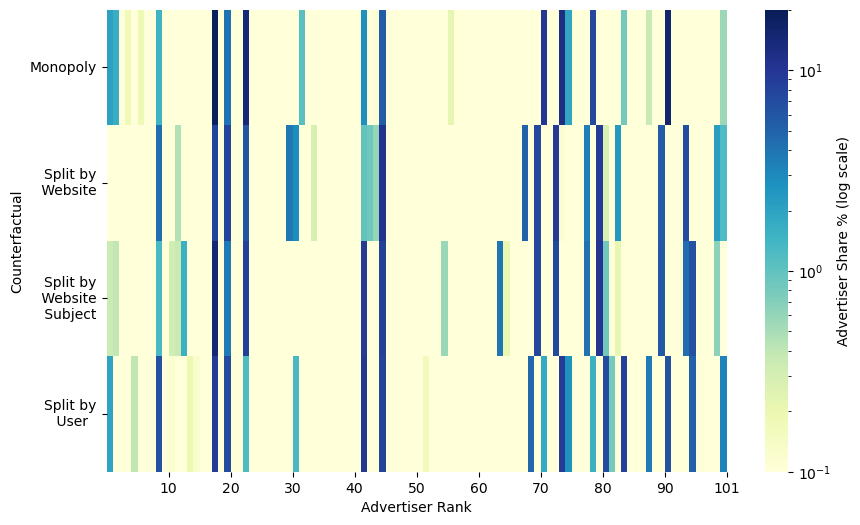

In [69]:
from matplotlib.colors import LogNorm

datasets = [monopoly_results, split1_results, split5_results, split7_results]
hist_data = [np.histogram(data.ad, bins=100)[0] for data in datasets]
hist_data = np.array(hist_data)

hist_data = hist_data / np.sum(hist_data, axis=1).reshape(4,1) * 100

plt.figure(figsize=(10, 6))

yticklabels = ['Monopoly', 'Split by\n Website', 'Split by\n Website\n Subject', 'Split by\n User  ']
ax = sns.heatmap(hist_data + 0.01, annot=False, fmt='d', cmap='YlGnBu', yticklabels=yticklabels, norm=LogNorm(vmin=0.1, vmax=20))
cbar = ax.collections[0].colorbar
cbar.set_label('Advertiser Share % (log scale)')
plt.xticks(np.arange(10, 101, 10), np.append(np.arange(10, 100, 10), 101))
plt.yticks(rotation=0)
# plt.xticklabels(np.arange(10, 100, 10))
plt.xlabel('Advertiser Rank')
plt.ylabel('Counterfactual')
# plt.title('Heatmap of Chosen Ads Histogram')

plt.savefig(f"..\\results\\Full Model\\Figures\\Chosen Ads Heatmap.jpg", dpi=600, bbox_inches='tight')
plt.savefig(f"..\\results\\Full Model\\Figures\\Chosen Ads Heatmap.eps", bbox_inches='tight')
plt.show()


In [84]:
np.sum(np.abs(hist_data[0] - hist_data[1])  > 1)

25

In [85]:
np.sum(np.abs(hist_data[0] - hist_data[2]) > 1)

21

In [86]:
np.sum(np.abs(hist_data[0] - hist_data[3]) > 1)

19

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


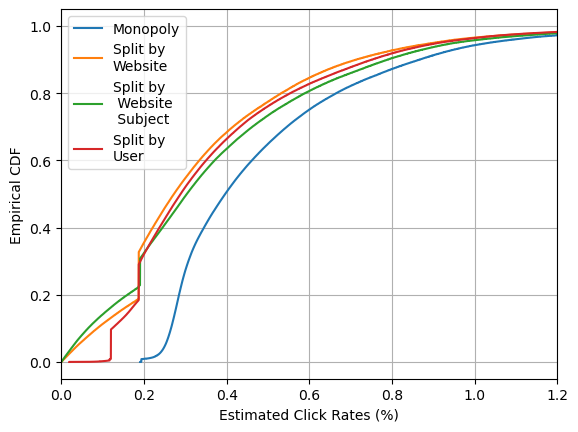

In [66]:
from statsmodels.distributions.empirical_distribution import ECDF
datasets = [monopoly_results, split1_results, split5_results, split7_results]
for dataset in datasets:
    ecdf = ECDF((dataset[dataset['ctr'] > 0].loc[0: 1000000, 'ctr']) * 100)
    plt.step(ecdf.x, ecdf.y, where="post")
plt.xlabel('Estimated Click Rates (%)')
plt.ylabel('Empirical CDF')
labels = ['Monopoly', 'Split by \nWebsite', 'Split by\n Website\n Subject', 'Split by \nUser']
# plt.title('Estimated Click Rates Distribution for Top 10 Ads')

plt.legend(labels)
plt.grid(True)
plt.xlim(0, 1.2)
# plt.savefig(f"..\\results\\Full Model\\Figures\\Click Rates Empirical CDF for Top 10 Ads.jpg", dpi=600)
plt.savefig(f"..\\results\\Full Model\\Figures\\Click Rates Empirical CDF for Different Scenarios.eps")
plt.show()



KeyboardInterrupt: 

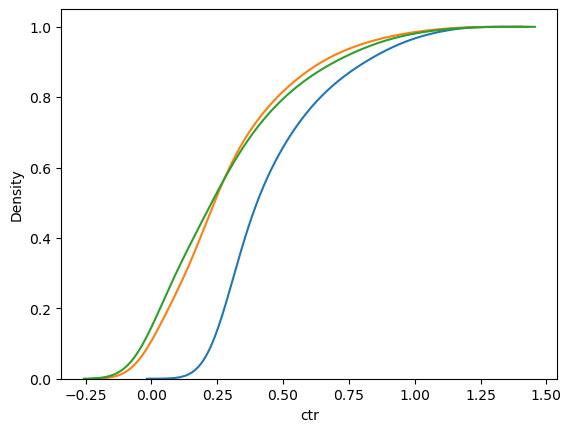

In [34]:
# datasets = [monopoly_results, split1_results, split3_results, split5_results, split7_results]
# ctr_hist_data = [np.histogram(data.ad, bins=100)[0] for data in datasets]
# ctr_hist_data = np.array(hist_data)

bw_adjust_ = 5

sns.kdeplot(monopoly_results[(monopoly_results['ctr'] < 1.2e-2)].loc[0:1000000, 'ctr'] * 100, bw_adjust=bw_adjust_, cumulative=True)
sns.kdeplot(split1_results[(split1_results['ctr'] < 1.2e-2)].loc[0:1000000, 'ctr'] * 100, bw_adjust=bw_adjust_, cumulative=True)
# sns.kdeplot(split3_results[(split3_results['ctr'] < 1.2e-2)].loc[0:1000000, 'ctr'] * 100, bw_adjust=bw_adjust_, cumulative=True)
sns.kdeplot(split5_results[(split5_results['ctr'] < 1.2e-2)].loc[0:1000000, 'ctr'] * 100, bw_adjust=bw_adjust_, cumulative=True)
sns.kdeplot(split7_results[(split7_results['ctr'] < 1.2e-2)].loc[0:1000000, 'ctr'] * 100, bw_adjust=bw_adjust_, cumulative=True)
plt.xlim(-0.01, 1.4)
plt.xlabel('Shown Ad Click Rate (%)')
plt.legend(['Monopoly', 'Split by Website', 'Split by Subject', 'Split by User', 'Split by Observetion'])

# plt.savefig(f"..\\results\\Full Model\\Figures\\CTRs CDF.jpg", dpi=600, bbox_inches='tight')
plt.show()

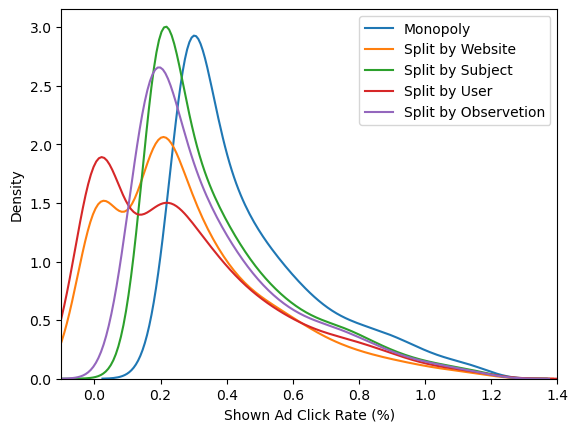

In [7]:
# datasets = [monopoly_results, split1_results, split3_results, split5_results, split7_results]
# ctr_hist_data = [np.histogram(data.ad, bins=100)[0] for data in datasets]
# ctr_hist_data = np.array(hist_data)

bw_adjust_ = 4

sns.kdeplot(monopoly_results[(monopoly_results['ctr'] < 1.2e-2)].loc[0:1000000, 'ctr'] * 100, bw_adjust=bw_adjust_, cumulative=False)
sns.kdeplot(split1_results[(split1_results['ctr'] < 1.2e-2)].loc[0:1000000, 'ctr'] * 100, bw_adjust=bw_adjust_, cumulative=False)
sns.kdeplot(split3_results[(split3_results['ctr'] < 1.2e-2)].loc[0:1000000, 'ctr'] * 100, bw_adjust=bw_adjust_, cumulative=False)
sns.kdeplot(split5_results[(split5_results['ctr'] < 1.2e-2)].loc[0:1000000, 'ctr'] * 100, bw_adjust=bw_adjust_, cumulative=False)
sns.kdeplot(split7_results[(split7_results['ctr'] < 1.2e-2)].loc[0:1000000, 'ctr'] * 100, bw_adjust=bw_adjust_, cumulative=False)
plt.xlim(-0.1, 1.4)
plt.xlabel('Shown Ad Click Rate (%)')
plt.legend(['Monopoly', 'Split by Website', 'Split by Subject', 'Split by User', 'Split by Observetion'])

plt.savefig(f"..\\results\\Full Model\\Figures\\CTRs PDF.jpg", dpi=600, bbox_inches='tight')
plt.show()

### CDF of Estimated Click Rates

In [2]:
monopoly_data = pd.read_stata(f"..\\results\\Full Model\\Simulation Results\\Simluation Results - Monopoly - chunk 1.dta")

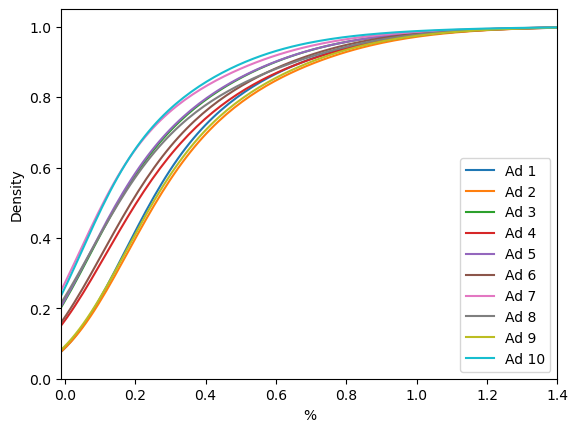

In [3]:

for rank in range(1, 11):
    var_name = f"y_{rank}"
    sns.kdeplot(monopoly_data[monopoly_data[var_name] < 1.5e-2].loc[0: 100000, var_name] * 100, alpha=1, bw_adjust=5, fill=False, cumulative=True)
plt.xlabel('%')
# plt.title('Estimated Click Rates Distribution for Top 10 Ads')
list = []
for i in range(1,11): 
    name = f"Ad {i}"
    list.append(name)
plt.legend(list)
plt.xlim(-0.01, 1.4)
plt.savefig(f"..\\results\\Full Model\\Figures\\Click Rates CDF for Top 10 Ads.jpg", dpi=600)


In [ ]:
for rank in range(1, 11):
    var_name = f"y_{rank}"
    sns.kdeplot(monopoly_data[monopoly_data[var_name] < 1.5e-2].loc[0: 100000, var_name] * 100, alpha=1, bw_adjust=5, fill=False, cumulative=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


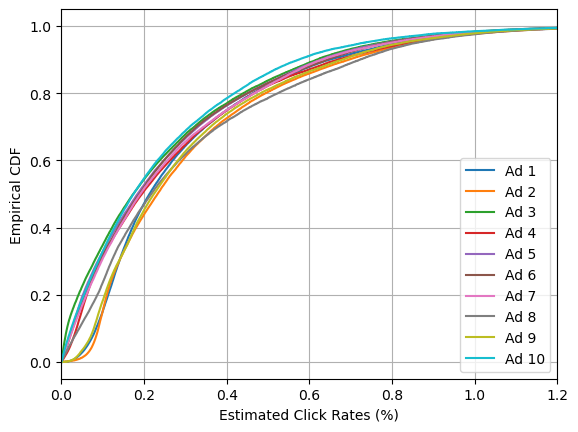

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF
for rank in range(1, 11):
    var_name = f"y_{rank}" 
    ecdf = ECDF(monopoly_data[((monopoly_data[var_name] > 0) & (monopoly_data[var_name] < 1.5e-2))].loc[0: 100000, var_name]  * 100)
    plt.step(ecdf.x, ecdf.y, where="post")
plt.xlabel('Estimated Click Rates (%)')
plt.ylabel('Empirical CDF')
# plt.title('Estimated Click Rates Distribution for Top 10 Ads')
list = []
for i in range(1,11): 
    name = f"Ad {i}"
    list.append(name)
plt.legend(list)
plt.grid(True)
plt.xlim(0, 1.2)
plt.savefig(f"..\\results\\Full Model\\Figures\\Click Rates Empirical CDF for Top 10 Ads.jpg", dpi=600)
plt.savefig(f"..\\results\\Full Model\\Figures\\Click Rates Empirical CDF for Top 10 Ads.eps")
plt.show()





### PDF of Estimated Click Rates

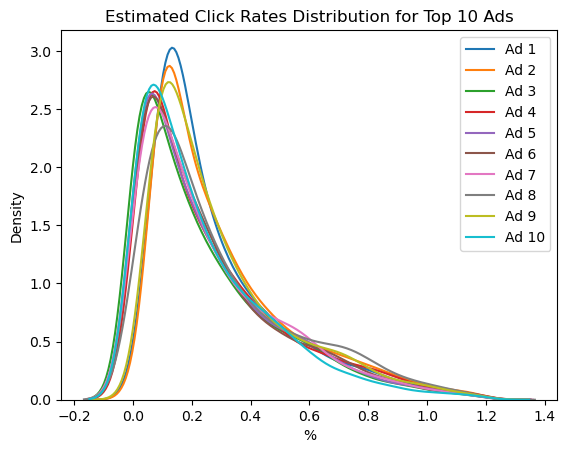

In [21]:
for rank in range(1, 11):
    var_name = f"y_{rank}"
    sns.kdeplot(monopoly_data[(monopoly_data[var_name] < 1.2e-2) & (monopoly_data[var_name] > 0)].loc[0: 100000, var_name] * 100, alpha=1, bw_adjust=2, fill=False, cumulative=False)
plt.xlabel('%')
plt.title('Estimated Click Rates Distribution for Top 10 Ads')
list = []
for i in range(1,11): 
    name = f"Ad {i}"
    list.append(name)
plt.legend(list)
plt.savefig(f"..\\results\\Full Model\\Figures\\Click Rates PDF for Top 10 Ads.jpg", dpi=600)

# Click Rate Correlations

In [142]:
N = 21 # number of top ads + 1
L = len(monopoly_data)

mat = np.zeros([N, N])


# mat
for i in range(1, N):
    for j in range(i + 1, N):
        var_1 = f'te_{i}'
        var_2 = f'te_{j}'
        p = np.sum(monopoly_data[var_1] > monopoly_data[var_2]) / L * 100
        # p = np.minimum(p, 100 - p)
        mat[i, j] = p 





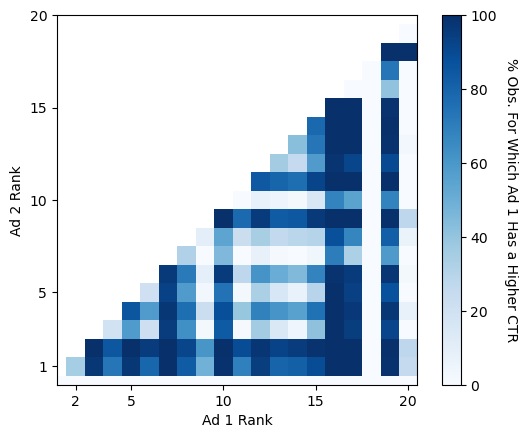

In [160]:
mask =  np.tri(mat.shape[0], k=0)
mat_masked = np.ma.array(mat, mask=mask)
# mat_masked = np.tri(mat, k=0)

plt.imshow(mat_masked, cmap='Blues', origin='lower', vmin=0, vmax=100)


# plt.colorbar()  # Add a colorbar
cbar = plt.colorbar()  # Create the colorbar
cbar.set_label('% Obs. For Which Ad 1 Has a Higher CTR', rotation=270, labelpad=15)  # Set the caption

# plt.title("Correlation of Browsing Subjects")
# subjects = ['Art', 'Childcare', 'Education', 'Entertainment', 'Finance', 'Heath', 'Lifestyle', 'Movies', 'Music', 'Other', 'Politics', 'Sport', 'Tech']
# plt.xticks(ticks=range(13), labels=subjects, rotation='vertical')
# plt.yticks(ticks=range(13), labels=subjects)
# plt.tight_layout(h_pad=0)
plt.xticks([2, 5, 10, 15, 20])
plt.yticks([1, 5, 10, 15, 20])

plt.xlabel('Ad 1 Rank')
plt.ylabel('Ad 2 Rank')
plt.xlim(1,20.5)
plt.ylim(0,20)
plt.savefig(f"..\\results\\Full Model\\Figures\\Pairwise Click Rate Comparison for Top 20 Ads.eps")
plt.show()


# Feature Importances for All Ad TEs

In [165]:
import pickle
import joblib

# create ranks_list
with open("..\\results\main_scenario\\ranks_list.pickle", "rb") as file:
    ranks_list = pickle.load(file)


ranks_list.pop(0)
ranks_list.pop(-1)


# import forests:
for rank in ranks_list:
    cf =  joblib.load(f'..\\results\\Full Model\\Monopoly\\CF - Rank {rank}.pkl')
    exec(f"cf_{rank} = cf")
    if rank % 20 == 0:
        print(f"rank {rank} model loaded!")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


rank 20 model loaded!
rank 40 model loaded!
rank 60 model loaded!
rank 80 model loaded!
rank 100 model loaded!


In [180]:
features = ['Repeats', 'Base Ad Repeats', 'Previous Clicks',
       'Base Ad Previous Clicks', 'All Ads Previous Clicks',
       'Total Pages Visited', 'Art', 'Childcare', 'Education', 'Entertainment',
       'Finance', 'Heath', 'Lifestyle', 'Movies', 'Music', 'Other', 'Politics',
       'Sport', 'Technology', 'Art FE', 'Childcare FE', 'Education FE',
       'Entertainment FE', 'Finance FE', 'Heath FE', 'Lifestyle FE',
       'Movies FE', 'Music FE', 'Other FE', 'Politics FE', 'Sport FE',
       'Technology FE', 'Website Rank within Subject', 'Day',
       'Hour of the Day', 'Mobile', 'Ads on the Page']
imp_df = pd.DataFrame(columns=features)
index = 0
for rank in ranks_list:
    exec(f"imp = cf_{rank}.feature_importances_")
    imp_df.loc[index] = imp
    index += 1

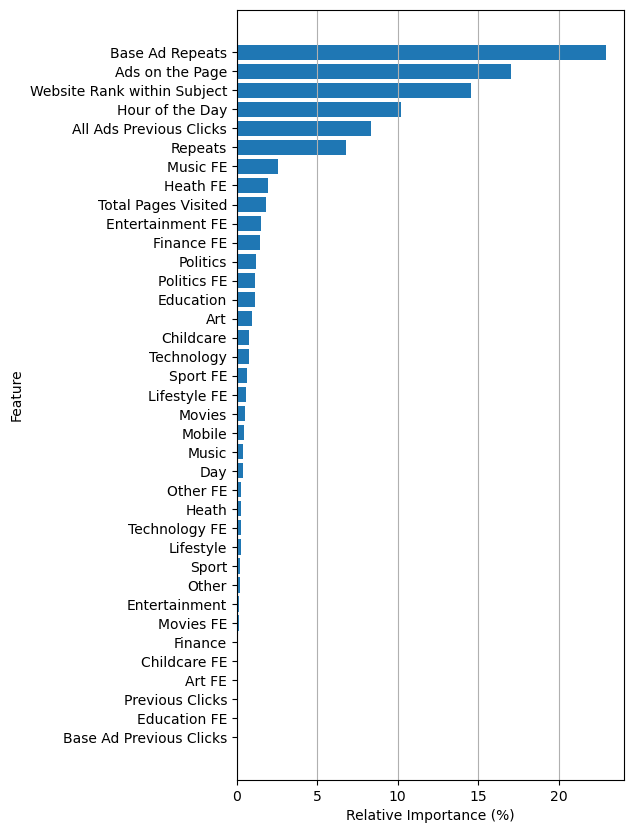

In [194]:
importances = (imp_df.mean()/ np.sum(imp_df.mean()) * 100).sort_values(ascending=True)
plt.rcParams["figure.figsize"] = (5,10)
plt.barh(importances.index , importances)
plt.xlabel('Relative Importance (%)')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.savefig(f"..\\results\\Full Model\\Figures\\Average Feature Importances for All TEs.eps", bbox_inches='tight')

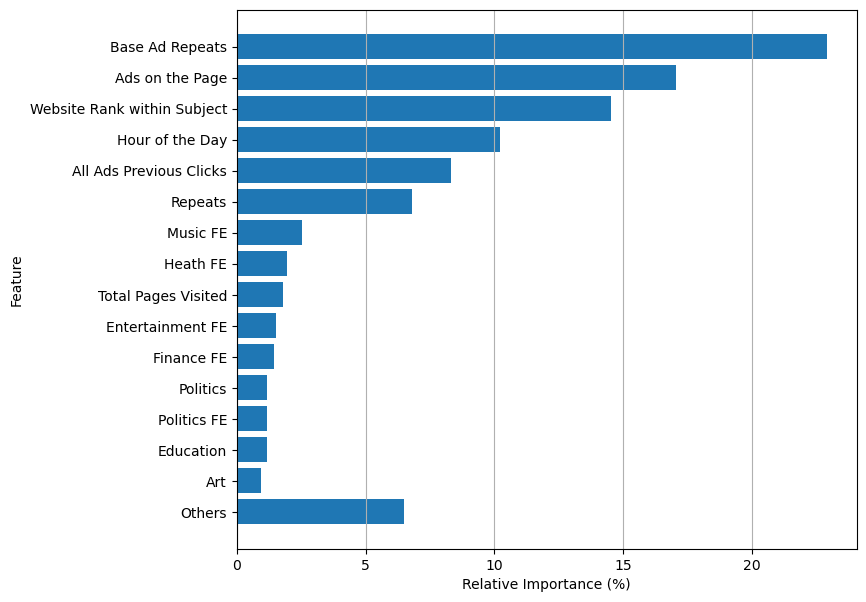

In [257]:
importances = (imp_df.mean()/ np.sum(imp_df.mean()) * 100).sort_values(ascending=True)
iportances_trunc = np.append([np.sum(importances[: -15])], importances[-15: ].values)
features_trunc = ["Others"] + importances[-15: ].index.to_list()
plt.rcParams["figure.figsize"] = (8, 7)
plt.barh(features_trunc, iportances_trunc)
plt.xlabel('Relative Importance (%)')
plt.ylabel('Feature')
plt.grid(axis='x')

plt.savefig(f"..\\results\\Full Model\\Figures\\Average Feature Importances for All TEs - Truncated.eps", bbox_inches='tight')